In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [13]:
interpreter = tf.lite.Interpreter(model_path= r'C:\Users\sahil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\Scripts\NewModel\1\model.tflite')  # Update with your model path
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_details
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 20,
  'shape': array([  1, 314]),
  'shape_signature': array([ -1, 314]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [22]:
labels = ['#',
 '$',
 '%',
 '&',
 '+',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'Downarrow',
 'E',
 'F',
 'G',
 'H',
 'I',
 'Im',
 'J',
 'K',
 'L',
 'Leftrightarrow',
 'Longleftrightarrow',
 'Longrightarrow',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'Re',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 'aa',
 'ae',
 'aleph',
 'alpha',
 'amalg',
 'angle',
 'approx',
 'ast',
 'astrosun',
 'asymp',
 'backsim',
 'backslash',
 'barwedge',
 'because',
 'beta',
 'between',
 'blacksquare',
 'blacktriangleright',
 'bot',
 'bowtie',
 'boxdot',
 'boxplus',
 'boxtimes',
 'bullet',
 'cap',
 'cdot',
 'celsius',
 'checked',
 'checkmark',
 'chi',
 'circ',
 'circlearrowleft',
 'circlearrowright',
 'circledR',
 'circledast',
 'circledcirc',
 'clubsuit',
 'cong',
 'coprod',
 'copyright',
 'cup',
 'curvearrowright',
 'dag',
 'dashv',
 'ddots',
 'degree',
 'delta',
 'diameter',
 'diamond',
 'diamondsuit',
 'div',
 'doteq',
 'dots',
 'dotsc',
 'ell',
 'emptyset',
 'epsilon',
 'equiv',
 'eta',
 'exists',
 'female',
 'fint',
 'flat',
 'forall',
 'frown',
 'fullmoon',
 'gamma',
 'geq',
 'geqslant',
 'gtrless',
 'gtrsim',
 'guillemotleft',
 'hbar',
 'heartsuit',
 'hookrightarrow',
 'iddots',
 'in',
 'infty',
 'int',
 'iota',
 'kappa',
 'lambda',
 'langle',
 'lceil',
 'leadsto',
 'leftarrow',
 'leftmoon',
 'leq',
 'leqslant',
 'lesssim',
 'lfloor',
 'lhd',
 'lightning',
 'llbracket',
 'longmapsto',
 'lozenge',
 'ltimes',
 'male',
 'mapsfrom',
 'mapsto',
 'mars',
 'mathbb{1}',
 'mathbb{H}',
 'mathbb{N}',
 'mathbb{Q}',
 'mathbb{R}',
 'mathbb{Z}',
 'mathcal{A}',
 'mathcal{B}',
 'mathcal{C}',
 'mathcal{D}',
 'mathcal{E}',
 'mathcal{F}',
 'mathcal{G}',
 'mathcal{H}',
 'mathcal{L}',
 'mathcal{M}',
 'mathcal{N}',
 'mathcal{O}',
 'mathcal{P}',
 'mathcal{R}',
 'mathcal{S}',
 'mathcal{T}',
 'mathcal{U}',
 'mathcal{X}',
 'mathcal{Z}',
 'mathds{1}',
 'mathds{C}',
 'mathds{E}',
 'mathds{N}',
 'mathds{P}',
 'mathds{Q}',
 'mathds{R}',
 'mathds{Z}',
 'mathfrak{A}',
 'mathfrak{M}',
 'mathfrak{S}',
 'mathfrak{X}',
 'mathscr{A}',
 'mathscr{C}',
 'mathscr{D}',
 'mathscr{E}',
 'mathscr{F}',
 'mathscr{H}',
 'mathscr{L}',
 'mathscr{P}',
 'mathscr{S}',
 'mathsection',
 'mid',
 'models',
 'mp',
 'mu',
 'multimap',
 'nRightarrow',
 'nabla',
 'nearrow',
 'neg',
 'neq',
 'nexists',
 'ni',
 'nmid',
 'notequiv',
 'notin',
 'nsubseteq',
 'nu',
 'nvDash',
 'odot',
 'ohm',
 'oiint',
 'oint',
 'omega',
 'ominus',
 'oplus',
 'otimes',
 'parallel',
 'parr',
 'partial',
 'perp',
 'phi',
 'pi',
 'pitchfork',
 'pm',
 'pounds',
 'prec',
 'preccurlyeq',
 'preceq',
 'prime',
 'prod',
 'propto',
 'psi',
 'rangle',
 'rceil',
 'rfloor',
 'rho',
 'rightarrow',
 'rightharpoonup',
 'rightleftarrows',
 'rightleftharpoons',
 'rightrightarrows',
 'rightsquigarrow',
 'rrbracket',
 'rtimes',
 'searrow',
 'setminus',
 'sharp',
 'shortrightarrow',
 'sigma',
 'sim',
 'simeq',
 'sphericalangle',
 'sqcap',
 'sqcup',
 'sqrt{}',
 'sqsubseteq',
 'square',
 'ss',
 'star',
 'subset',
 'subseteq',
 'subsetneq',
 'succ',
 'succeq',
 'sum',
 'sun',
 'supset',
 'supseteq',
 'tau',
 'therefore',
 'theta',
 'times',
 'top',
 'triangle',
 'triangledown',
 'triangleleft',
 'trianglelefteq',
 'triangleq',
 'triangleright',
 'twoheadrightarrow',
 'uparrow',
 'upharpoonright',
 'uplus',
 'varepsilon',
 'varkappa',
 'varnothing',
 'varoiint',
 'varphi',
 'varpi',
 'varpropto',
 'varrho',
 'varsubsetneq',
 'vartheta',
 'vartriangle',
 'vdash',
 'vdots',
 'vee',
 'venus',
 'wedge',
 'with',
 'wp',
 'wr',
 'xi',
 'zeta',
 '{',
 '}']

character_mapping = {i: char for i, char in enumerate(labels)}


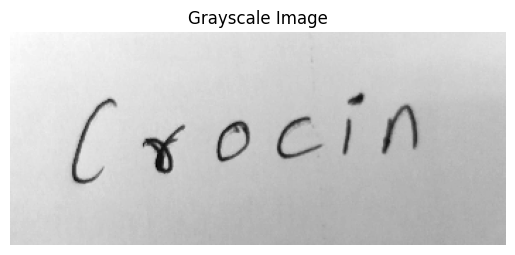

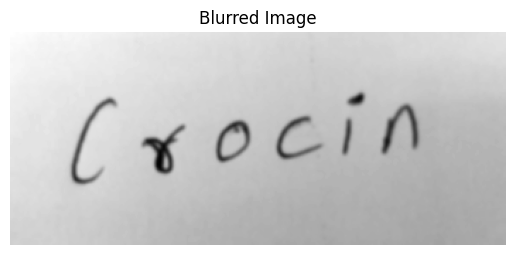

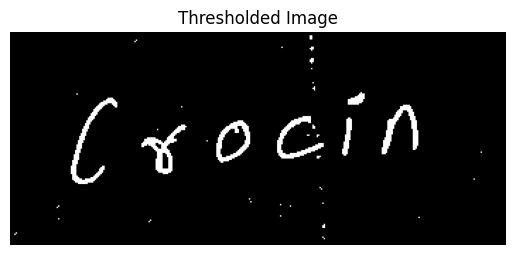

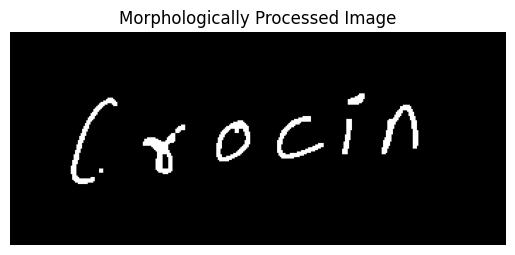

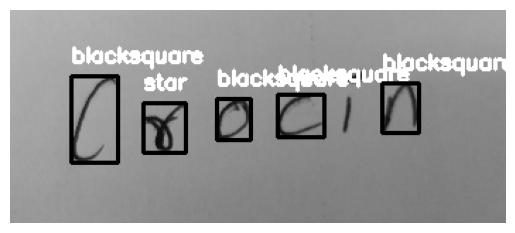

Predicted medicine name: blacksquarestarblacksquareblacksquareblacksquare


In [27]:
def load_and_resize_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (351, 151)) 
    return img

def convert_to_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def apply_gaussian_blur(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

def adaptive_threshold(img):
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY_INV, 11, 2)

def apply_morphological_operations(thresh_img):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    morph_img = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)
    morph_img = cv2.morphologyEx(morph_img, cv2.MORPH_OPEN, kernel)
    return morph_img

def detect_contours(thresh_img):
    contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def recognize_characters(contours, img):
    predictions = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w < 15 or h < 15:  
            continue
        roi = img[y:y + h, x:x + w]
        roi = cv2.resize(roi, (32, 32)) 
        roi = roi.astype('float32') / 255.0  
        roi = np.expand_dims(roi, axis=-1)  
        roi = np.expand_dims(roi, axis=0) 
    
        interpreter.set_tensor(input_details[0]['index'], roi)

        interpreter.invoke()
        output_data = interpreter.get_tensor(output_details[0]['index'])
        predicted_class = np.argmax(output_data[0]) 
        predicted_character = character_mapping.get(predicted_class, "?")
        predictions.append((predicted_character, (x, y, w, h)))

    predictions.sort(key=lambda item: item[1][0]) 
    return predictions 

def draw_results(img, predictions):
    for (predicted_character, (x, y, w, h)) in predictions:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, predicted_character, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    return img

image_path = r'C:\Users\sahil\Downloads\Crocin.jpg' 
img = load_and_resize_image(image_path)
gray_img = convert_to_grayscale(img)

plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

blurred_img = apply_gaussian_blur(gray_img)
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()

thresh_img = adaptive_threshold(blurred_img)
plt.imshow(thresh_img, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

morph_img = apply_morphological_operations(thresh_img)
plt.imshow(morph_img, cmap='gray')
plt.title('Morphologically Processed Image')
plt.axis('off')
plt.show()

contours = detect_contours(morph_img)
predictions = recognize_characters(contours, gray_img) 
result_img = draw_results(gray_img.copy(), predictions) 

plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

predicted_medicine_name = ''.join([char for char, _ in predictions]) 
print(f'Predicted medicine name: {predicted_medicine_name}')